In [24]:
from google.colab import files
uploaded = files.upload()


Saving fftdataset.csv to fftdataset.csv


In [26]:
import pandas as pd

df = pd.read_csv("fftdataset.csv")
print(df.columns.tolist())


['acc_spec_rms', 'acc_centroid', 'acc_bandwidth', 'acc_peak_freq', 'acc_peak_mag', 'acc_low_energy', 'acc_high_energy', 'cur_spec_rms', 'cur_centroid', 'cur_bandwidth', 'cur_peak_freq', 'cur_peak_mag', 'cur_low_energy', 'cur_high_energy', 'cur_mean', 'Healthy', 'Friction', 'Inertia', 'LF_Torque', 'HF_Torque']


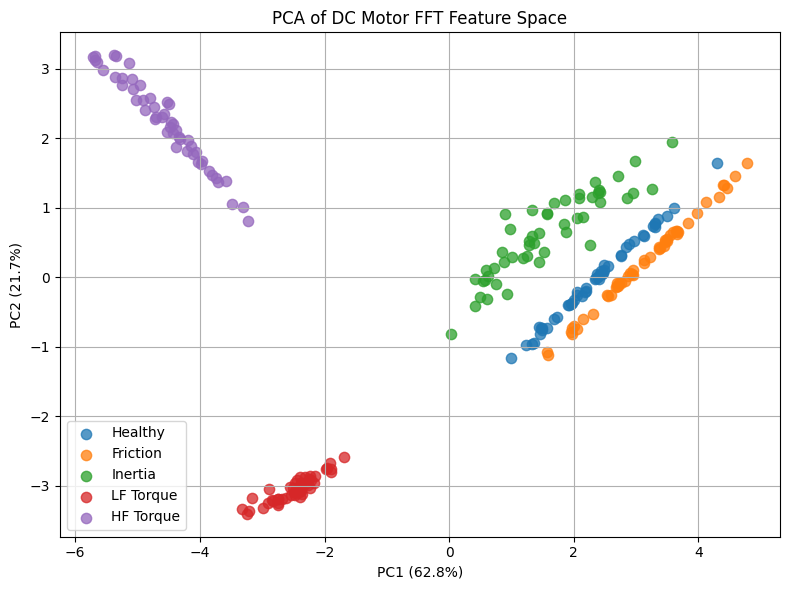

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ==================================================
# Load dataset
# ==================================================
df = pd.read_csv("fftdataset.csv")

# FFT feature columns
feature_cols = [
    'acc_spec_rms','acc_centroid','acc_bandwidth',
    'acc_peak_freq','acc_peak_mag','acc_low_energy','acc_high_energy',
    'cur_spec_rms','cur_centroid','cur_bandwidth',
    'cur_peak_freq','cur_peak_mag','cur_low_energy','cur_high_energy',
    'cur_mean'
]

# One-hot label columns
label_cols = ['Healthy','Friction','Inertia','LF_Torque','HF_Torque']

X = df[feature_cols].to_numpy()
Y = df[label_cols].to_numpy()

# Convert one-hot → class index
y = np.argmax(Y, axis=1)

class_names = ['Healthy','Friction','Inertia','LF Torque','HF Torque']
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']

# ==================================================
# Feature normalization (CRITICAL for PCA)
# ==================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==================================================
# PCA (2D)
# ==================================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

var_exp = pca.explained_variance_ratio_ * 100

# ==================================================
# Visualization
# ==================================================
plt.figure(figsize=(8,6))

for i, name in enumerate(class_names):
    mask = (y == i)
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        s=55,
        alpha=0.75,
        label=name
    )

plt.xlabel(f"PC1 ({var_exp[0]:.1f}%)")
plt.ylabel(f"PC2 ({var_exp[1]:.1f}%)")
plt.title("PCA of DC Motor FFT Feature Space")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [32]:
import pandas as pd
import numpy as np

df = pd.read_csv('dc_motor_fft_5class_dataset.csv')

feature_cols = [
    'acc_spec_rms','acc_centroid','acc_bandwidth',
    'acc_peak_freq','acc_peak_mag','acc_low_energy','acc_high_energy',
    'cur_spec_rms','cur_centroid','cur_bandwidth',
    'cur_peak_freq','cur_peak_mag','cur_low_energy','cur_high_energy'
]

label_cols = ['Healthy','Friction','Inertia','LF_Torque','HF_Torque']

X = df[feature_cols].values
Y = df[label_cols].values


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=108, stratify=Y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(32, activation='relu', input_shape=(14,)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,093 (4.27 KB)

 Trainable params: 1,093 (4.27 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(
    X_train, y_train,
    epochs=60,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


Epoch 1/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.4320 - loss: 1.5066 - val_accuracy: 0.3947 - val_loss: 1.3970
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4266 - loss: 1.3629 - val_accuracy: 0.4474 - val_loss: 1.2457
Epoch 3/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4865 - loss: 1.2205 - val_accuracy: 0.4737 - val_loss: 1.1190
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6538 - loss: 1.1034 - val_accuracy: 0.6316 - val_loss: 1.0019
Epoch 5/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6799 - loss: 1.0062 - val_accuracy: 0.8158 - val_loss: 0.9027
Epoch 6/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7448 - loss: 0.9401 - val_accuracy: 0.8158 - val_loss: 0.8205
Epoch 7/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7956 - loss: 0.8408 - val_accuracy: 0.8158 - val_loss: 0.7443
Epoch 8/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7794 - loss: 0.7943 - val_accuracy: 0.8158 - val_l

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
              precision    recall  f1-score   support

     Healthy       0.86      0.92      0.89        13
    Friction       0.92      0.85      0.88        13
     Inertia       1.00      1.00      1.00        12
   LF_Torque       1.00      1.00      1.00        13
   HF_Torque       1.00      1.00      1.00        12

    accuracy                           0.95        63
   macro avg       0.95      0.95      0.95        63
weighted avg       0.95      0.95      0.95        63



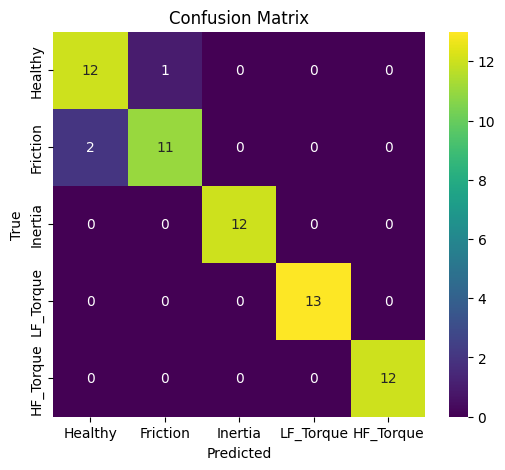

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_cls = np.argmax(y_pred, axis=1)
y_true_cls = np.argmax(y_test, axis=1)

print(classification_report(
    y_true_cls,
    y_pred_cls,
    target_names=label_cols
))

cm = confusion_matrix(y_true_cls, y_pred_cls)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=label_cols,
            yticklabels=label_cols,
            cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


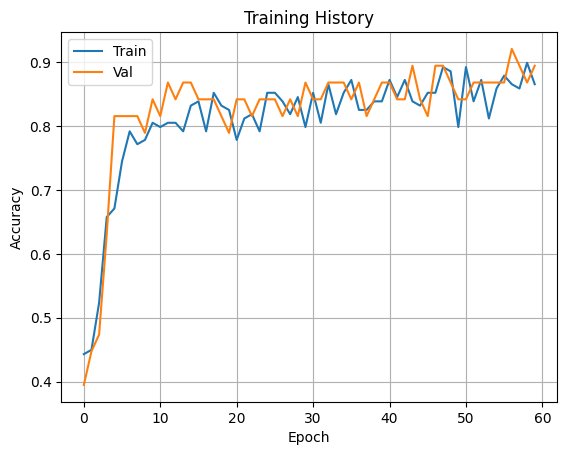

In [42]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.grid()
plt.show()
